```
Universidade Federal de Sergipe
Centro de Ciências Exatas e Tecnologia
Departamento de Matemática
Álgebra Linear Computacional
Prof Evilson
```

##### Utilizando código sugestâo do professor

> Observação: Primeiro passo nessa parte do código


In [17]:
# Importando módulos para manipulação de matrizes
import numpy as np
from numpy import linalg as la
from sklearn.decomposition import TruncatedSVD
import random

# Importando módulos para manipulação de imagens e gráficos
import glob
from PIL import Image
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Importando módulos Perceptron
from sklearn.linear_model import Perceptron

In [3]:
# funções

def plotar_foto(foto_lista):
    fig, ax = plt.subplots()
    foto = np.reshape(foto_lista, (193, 162))
    
    ax.imshow(foto, cmap='gray', vmin=0, vmax=255)
    plt.show()

def plotar_fotos(foto1_lista, foto2_lista):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    
    foto1 = np.reshape(foto1_lista, (193, 162))
    foto2 = np.reshape(foto2_lista, (193, 162))
    
    ax1.imshow(foto1, cmap='gray', vmin=0, vmax=255)
    ax2.imshow(foto2, cmap='gray', vmin=0, vmax=255)
    
    plt.show()

In [4]:
# Caminho para as imagens e criação da matriz
IMAGES_DIR = r"C:\Users\heito\Documents\estudos-programacao\Algebra linear computacional\Av3\imagens"
IMAGE_HEIGHT = 193
IMAGE_WIDTH = 162

file_names = glob.glob(IMAGES_DIR + "/*.jpg")
im_number = len(file_names)

matrix = np.empty([im_number, IMAGE_HEIGHT * IMAGE_WIDTH])

In [5]:
# Inserindo as fotos na matriz criada
for i in range(im_number//2):
    
    image = Image.open(f'{IMAGES_DIR}/{str(i+1)}a.jpg')
    array = np.asarray(image).ravel()
    matrix[2*i] = array
    
    image = Image.open(f'{IMAGES_DIR}/{str(i+1)}b.jpg')
    array = np.asarray(image).ravel()
    matrix[2*i+1] = array

# Verificando a matriz
print(f'height = {matrix.shape[0]} | width = {matrix.shape[1]}')

print(matrix)

height = 400 | width = 31266
[[254. 252. 252. ...  65.  70.  70.]
 [250. 252. 252. ...  70.  76.  78.]
 [ 65.  52.  32. ...   0.   0.   0.]
 ...
 [ 76.  33.  39. ...   0.   0.   0.]
 [209. 209. 215. ... 133. 133. 163.]
 [220. 217. 217. ... 154. 158. 158.]]


-----------------------------------------------------------------

# Questões 

-----------------------------------------------------------------


Vetor médio [162.1675 161.3975 160.685  ...  60.89    61.8675  63.815 ] 



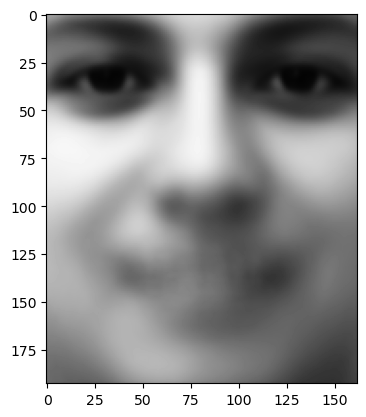

In [6]:
# Passo 2 para exibir a imagem média

im_media = np.mean(matrix, axis=0) 
print(f'\nVetor médio {im_media}', '\n')

plotar_foto(im_media)

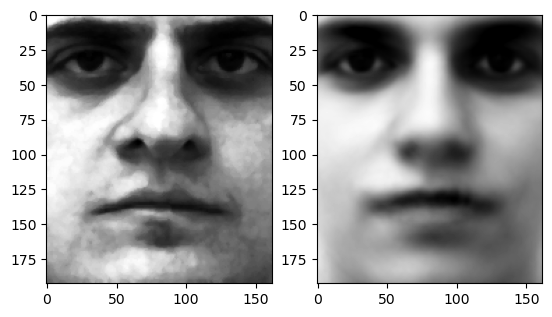

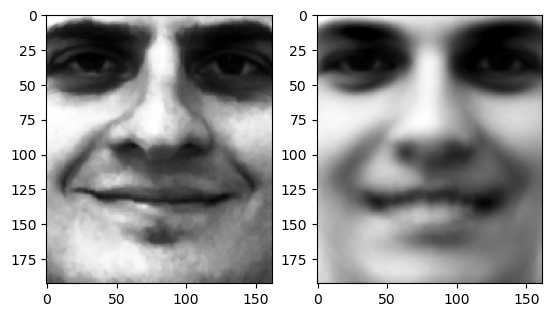

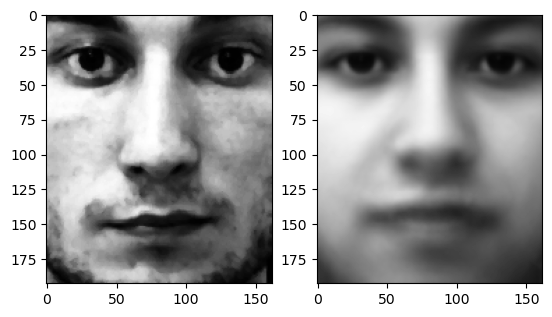

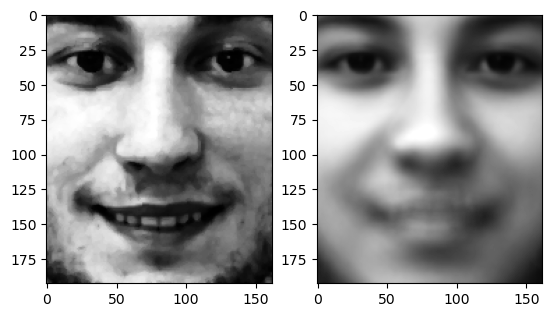

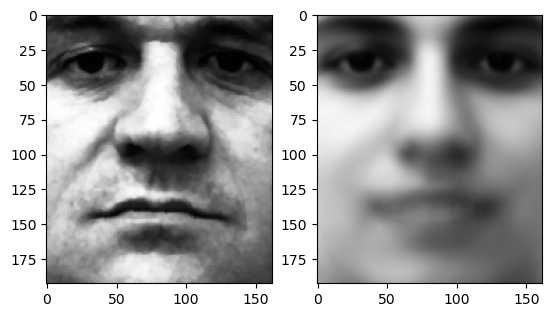

In [7]:
# Passos 3 e 4

M = matrix - im_media # Subtraindo a imagem média

U, S, Vh = la.svd(M, full_matrices=False) # Aplicando o SVD

k = 5 # Num de componentes e de fotos

fotos_reconstruidas = np.zeros((k, M.shape[1])) # Criando a matriz para armazenar "fotos novas"

for i in range(k):
    for j in range(k):
        fotos_reconstruidas[i] += U[i, j] * S[j] * Vh[j] # Aplicando os coeficientes(a_i = U[i,j] * S[j])
    fotos_reconstruidas[i] += im_media # Somando a imagem média para obter as fotos com as 5 componentes
    
    plotar_fotos(matrix[i, :], fotos_reconstruidas[i, :])

In [8]:
# Preparando para o treinamento do classificador
# Caminho para as imagens e criação da matriz de homens e mulheres
IMAGES_DIR = r"C:\Users\heito\Documents\estudos-programacao\Algebra linear computacional\Av3\imagens\homens_mulheres"

file_names = glob.glob(IMAGES_DIR + "/*.jpg")
pic_number = len(file_names)

fotos_treinamento = np.empty([pic_number, IMAGE_HEIGHT * IMAGE_WIDTH])

# Inserindo as fotos na matriz criada
# Aqui o arquivo foi organizado para que as fotos de mulheres viessem após as fotos dos homens
for i in range(pic_number//2):
    
    image = Image.open(f'{IMAGES_DIR}/{str(i+1)}a.jpg')
    array = np.asarray(image).ravel()
    fotos_treinamento[2*i] = array
    
    image = Image.open(f'{IMAGES_DIR}/{str(i+1)}b.jpg')
    array = np.asarray(image).ravel()
    fotos_treinamento[2*i+1] = array

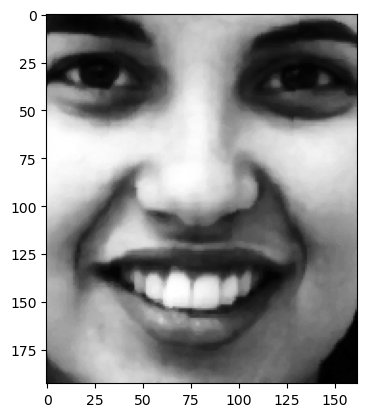

Mulher


In [45]:
# Perceptron com 3 componentes principais

labels = np.ones(40, dtype=int) # Criando a matriz de rótulos
for i in range(fotos_treinamento.shape[0]): # Aplicando -1 para os homens e 1 para mulheres
    if i < 20:
        labels[i] = -1
    else:
        labels[i] = 1
        
svd_3c = TruncatedSVD(n_components=3) # Configurando para que o SVD tenha 3 componentes
components = svd_3c.fit_transform(matrix)

dados_treinamento = svd_3c.transform(fotos_treinamento) # Aplicando as componentes nas fotos de treinamento

clf_gen = Perceptron()
clf_gen.fit(dados_treinamento, labels) # Treinando o perceptron

dados_teste = svd_3c.fit_transform(fotos_teste)  # Projeção das fotos de teste nas mesmas tres componentes principais
predicoes = clf_gen.predict(dados_teste)

# Exibindo a foto e a previsão
a = random.randint(0, 359)
plotar_foto(fotos_teste[a, :])
print('Mulher') if predicoes[a] == 1 else print('Homem')

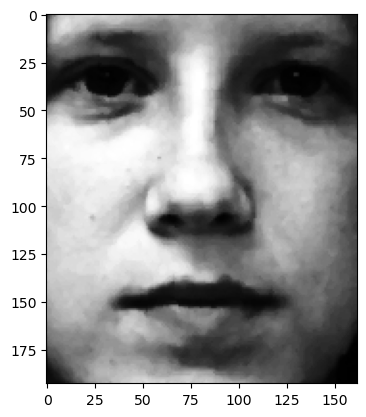

Mulher


In [48]:
# Perceptron com 2 componentes principais
        
svd_2c = TruncatedSVD() 
componentes = svd_2c.fit_transform(matrix) # TruncatedSVD() tem como padrão as 2 primeiras componentes principais

dados_treinamento = svd_2c.transform(fotos_treinamento) # Aplicando as componentes nas fotos de treinamento

clf_gen = Perceptron()
clf_gen.fit(dados_treinamento, labels) # Treinando o perceptron

fotos_teste = np.empty([im_number - pic_number, IMAGE_HEIGHT * IMAGE_WIDTH]) # Essa matriz terá as fotos que não são de treinamento

for i in range(im_number - pic_number):
    if not any(np.all(matrix[i, :] == linha) for linha in fotos_treinamento): # Inserindo as fotos
        fotos_teste[i, :] = matrix[i, :]

dados_teste = svd_2c.fit_transform(fotos_teste)  # Projeção das fotos de teste nas mesmas duas componentes principais
predicoes = clf_gen.predict(dados_teste) # Obtendo as predições

# Exibindo a foto e a previsão
a = random.randint(0, 359)
plotar_foto(fotos_teste[a, :])
print('Mulher') if predicoes[a] == 1 else print('Homem')

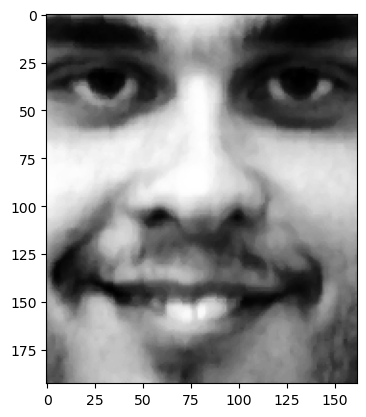

Neutro


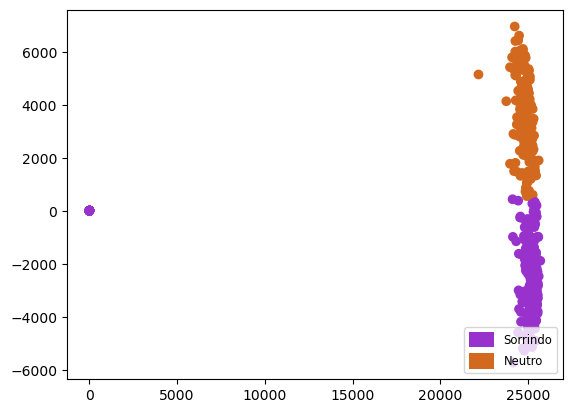

In [51]:
# Mudando os rótulos para as fotos neutras e sorrindo
for i in range(fotos_treinamento.shape[0]):
    if i % 2 == 0:
        labels[i] = -1
    else:
        labels[i] = 1

clf_sorriso = Perceptron()
clf_sorriso.fit(dados_treinamento, labels) # Treinando o classificador para sorriso

predicoes = clf_sorriso.predict(dados_teste) # Fazendo as previsões

# Exibindo a foto e a previsão
a = random.randint(0, 359)
plotar_foto(fotos_teste[a, :])
print('Sorrindo') if predicoes[a] == 1 else print('Neutro')

x, y = dados_teste.T
c = list(map(lambda g: 'darkorchid' if g == -1 else 'chocolate', predicoes))

um = mpatches.Patch(facecolor='darkorchid', label='Sorrindo', linewidth = 1)
dois = mpatches.Patch(facecolor='chocolate', label='Neutro', linewidth = 1)

legenda = plt.legend(handles=[um,dois], loc=4, fontsize='small', handleheight=1.7, handlelength=2.2)

plt.scatter(x,y, c=c)
plt.show()

Coeficientes da foto neutra: [ -730.55741959   267.07502635  2466.44078752  4625.41139018
  1540.34317458   395.36435443   297.43545873  -107.0204479
 -1512.82638468  1695.11836296]
Coeficientes da foto sorrindo: [ -711.69349539   448.17222652  2345.83830032  4626.01511218
  1380.67605386   330.98580571    69.6326162   -300.2471419
 -1386.62520543  1625.75036132]


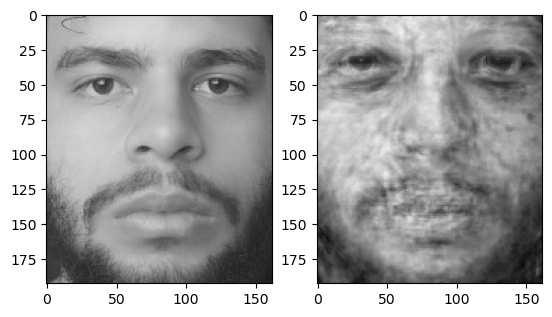

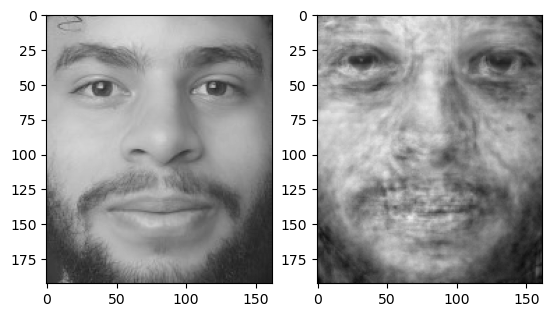

In [12]:
# Passo 5

"""Trazendo minhas fotos para as variáveis"""

MY_IMAGES = r"C:\Users\heito\Documents\estudos-programacao\Algebra linear computacional\Av3\imagens\Minhas fotos"

minhas_fotos = np.empty([2, IMAGE_HEIGHT * IMAGE_WIDTH])

neutro = Image.open(f'{MY_IMAGES}/{str(1)}a.jpg').convert('L')
foto_neutro = np.asarray(neutro).ravel()
    
sorrindo = Image.open(f'{MY_IMAGES}/{str(1)}b.jpg').convert('L')
foto_sorrindo = np.asarray(sorrindo).ravel()

#############################################################################################################

# Obtendo as diferenças da imagem média
dif_neutro = foto_neutro - im_media
dif_sorrindo = foto_sorrindo - im_media

svd = TruncatedSVD(n_components=400)
svd.fit(matrix) # Obtendo as 400 componentes

coef_neutro = dif_neutro @ svd.components_.T # Coeficientes da foto neutro
coef_sorrindo = dif_sorrindo @ svd.components_.T # Coeficientes da foto sorrindo

print(f"Coeficientes da foto neutra: {coef_neutro[:10]}") 
print(f"Coeficientes da foto sorrindo: {coef_sorrindo[:10]}")

# Projeções feitas com todos os coeficientes, para que a projeção seja com 10 componentes basta usar um slice
proj_neutro = (coef_neutro @ svd.components_) + im_media
proj_sorrindo = (coef_sorrindo @ svd.components_) + im_media

# Exibindo as fotos e suas projeções usando todas as componentes
plotar_fotos(foto_neutro, proj_neutro)
plotar_fotos(foto_sorrindo, proj_sorrindo)

# Relato do experimento

De acordo com o que foi testado e experimentado nessa avaliação há alguns pontos que são interessantes de serem destacados, são eles:

- Como funciona a imagem média
- Precisão dos classificadores
- Projeção das fotos

##### Imagem média
Para o **Passo 2** é perceptível que a imagem média tenta mostrar da forma mais nítida possível a semelhança de todas as fotos, vemos que a parte dos olhos está bem menos desfocada que a parte da boca, uma vez que além das diferenças entre homens e mulheres, também há fotos em que estão sérios ou sorrindo. 

Para os **Passos 3 e 4**, continuamos a ver como a imagem média tem impacto para a identificação das fotos, uma vez que ela permite encontrar variações relativas quando centraliza os dados. 

É visto que uma das fotos com as 5 componentes principais não é necessariamente semelhante, isso se dá porque para as 400 fotos as 5 primeiras componentes não conseguem representar todas as características possíveis das fotos de forma nítida, então algumas fotos representadas dessa maneira podem não ficar semelhantes. 

##### Precisão dos classificadores
Em seguida temos os classificadores(**Passos 6 e 7**), nesse caso foi utilizado um perceptron nativo do python para os dois casos que foram solicitados, com 2 componentes e com 3 componentes. Feitos alguns testes para a classificação de gênero foi possível ver a imprecisão do perceptron com 2 componentes, no qual ele quase não consegue identificar ou pode até acontecer de classificar todos com o mesmo valor. Já para o perceptron com 3 componentes, é visto que este possui uma maior precisão e consegue identificar de certa maneira algumas fotos.

Para a classificação do sorriso foi usado o perceptron com 3 componentes. Acredito que por conta da diferença expressiva entre fotos sérias e fotos sorrindo é possível perceber que o classificador comete poucos erros nesse caso específico(para visualizar o resultado nesse caso foi plotado um gráfico para entender como as fotos ficaram após a projeção).

##### Projeção das fotos
Voltando ao **Passo 5** onde foi explorada novamente a imagem média e as projeções de cada foto de acordo com as componentes obtidas no SVD. É visto que quanto mais componentes são utilizadas, mais as imagens parecem se assemelhar(foram feitos testes com as 400 componentes e com as 10, decidi deixar com as 400), para o uso do SVD foi necessário subtrair a imagem média de forma que as componentes estivessem centralizadas para que um resultado mais satisfatório fosse obtido. 

Com isso temos os coeficientes e as componentes principais que tornam possíveis escrever qualquer foto com as mesmas propriedades como combinação linear das fotos que temos no banco de dados. Nesse passo foi possível experimentar isso e conseguir um resultado um tanto quanto satisfatório.